# Regression Using XG-Boost

What is XGBoost?

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

Implementation of XGBoost

https://www.datacamp.com/community/tutorials/xgboost-in-python


Here, we are implementing basic Xgboost on kaggle competition i.e House Price Prediction 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

We are given many features that a person wants to have in his house. On the basis of these feature, price of house is estimated.

So, here we are given a number of features(almost 80) and we need to predict the price of the house.

## 1) Importing the libraries

In [0]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## For Training

## 2) Data Preprocessing

In [0]:
df = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/train.csv')

In [0]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [0]:
# Checking information of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
# Printing the features along with their total null values

cols = np.array(df.columns)
for col in cols:
  print(col , df[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [0]:
# Deleting the features having count of null values > half of length of dataframe

cols_to_del = []
for i in df.columns:
  if df[i].isnull().sum() > len(df)*0.5:
    cols_to_del.append(i)

cols_to_del    

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [0]:
for i in cols_to_del:
  df = df.drop(i,axis=1)

df = df.drop('Id',axis = 1)

In [0]:
# Checking the total null values remaining as well the features datatype

cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0      object
LotFrontage         259     float64
LotArea              0       int64
Street               0      object
LotShape             0      object
LandContour           0      object
Utilities            0      object
LotConfig            0      object
LandSlope            0      object
Neighborhood           0      object
Condition1           0      object
Condition2           0      object
BldgType             0      object
HouseStyle           0      object
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0      object
RoofMatl             0      object
Exterior1st           0      object
Exterior2nd           0      object
MasVnrType           8      object
MasVnrArea           8     float64
ExterQual            0      object
ExterCond            0      object
Foundation           0      object
BsmtQual  

In [0]:
# Taking categorical features out for work and transformation

cat_cols = []

for col in df.columns:
  if df[col].dtype == 'O':
    cat_cols.append(col)

cat_cols    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [0]:
# Converting the datatype from `Object` to `Category`

for col in cat_cols:
  df[col] = df[col].astype('category')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [0]:
# Converting the values of categorical data to int

for col in cat_cols:
  df[col] = df[col].cat.codes.values

In [0]:
cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0        int8
LotFrontage         259     float64
LotArea              0       int64
Street               0        int8
LotShape             0        int8
LandContour           0        int8
Utilities            0        int8
LotConfig            0        int8
LandSlope            0        int8
Neighborhood           0        int8
Condition1           0        int8
Condition2           0        int8
BldgType             0        int8
HouseStyle           0        int8
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0        int8
RoofMatl             0        int8
Exterior1st           0        int8
Exterior2nd           0        int8
MasVnrType           0        int8
MasVnrArea           8     float64
ExterQual            0        int8
ExterCond            0        int8
Foundation           0        int8
BsmtQual  

In [0]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,-1,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
5,50,3,85.0,14115,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,-1,1,1993.0,2,2,480,4,4,2,40,30,0,320,0,0,700,10,2009,8,4,143000
6,20,3,75.0,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,2004.0,1,2,636,4,4,2,255,57,0,0,0,0,0,8,2007,8,4,307000
7,60,3,NaN,10382,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,4,1,1973.0,1,2,484,4,4,2,235,204,228,0,0,0,350,11,2009,8,4,200000
8,50,4,51.0,6120,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,4,5,1931.0,2,2,468,1,4,2,90,0,205,0,0,0,0,4,2008,8,0,129900
9,190,3,50.0,7420,1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,3,4,0,3,3,3,2,851,5,0,140,991,1,0,1,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,4,1,1939.0,1,1,205,2,4,2,0,4,0,0,0,0,0,1,2008,8,4,118000


## 3) Splitting the data into X features and Y label

In [0]:
X = df.drop('SalePrice',axis = 1)
y = np.log(df['SalePrice'])

In [0]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [0]:
# Using XG-Boost

input_data = xgb.DMatrix(data=X,label=y)

In [0]:
input_data

In [0]:
# Splitting of data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 4) Building the XGBoost model

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.01,
                          max_depth = 15, 
                          alpha = 10, 
                          n_estimators = 1000)

## 5) Training the model

In [0]:
xg_reg.fit(X_train,y_train)

[11:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 6) Predicting the sample results

In [0]:
preds = xg_reg.predict(X_test)

## 7) Checking the accuracy

In [0]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.118473


## 8) Applying K-fold CrossValidation (Optional)

In [0]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.01,
          'max_depth': 15, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=input_data, 
                    params=params, 
                    nfold=5,
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.415979,0.005527,11.415959,0.022355
1,11.302142,0.005469,11.302122,0.022411
2,11.189444,0.005413,11.189425,0.022463
3,11.077873,0.005357,11.077853,0.022517
4,10.967422,0.005302,10.967401,0.022567


In [0]:
print((cv_results["test-rmse-mean"]).tail(1))

999    0.149585
Name: test-rmse-mean, dtype: float64


## 9) Checking for the important features of the dataframe

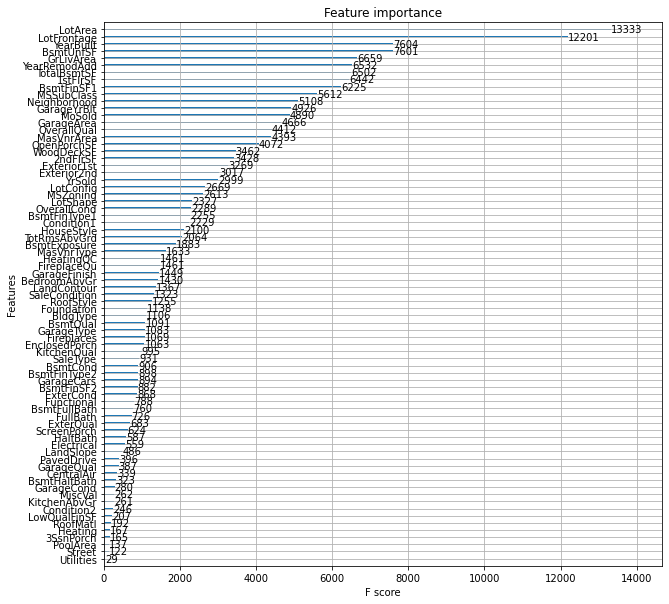

In [0]:
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

## 10) Checking top 35 features from the dataframe

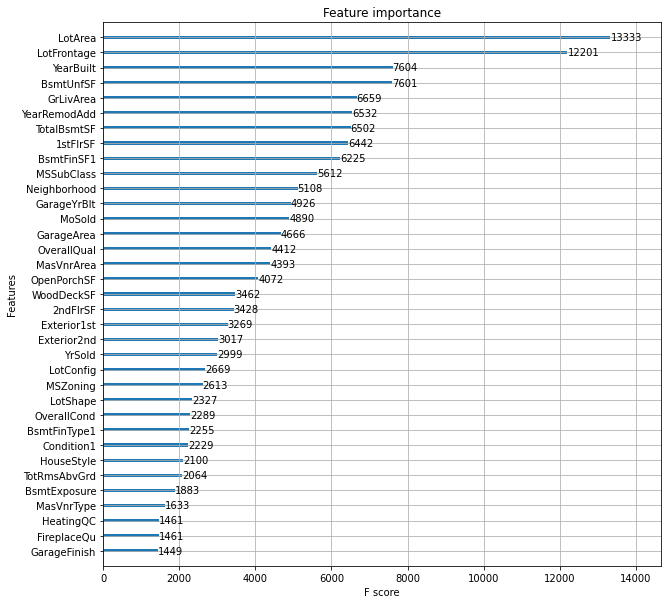

In [0]:
xgb.plot_importance(xg_reg,max_num_features=35)
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## 11) Using Grid Search CV for parameter tuning

In [0]:
# from sklearn.model_selection import GridSearchCV

In [0]:
"""
parameters = {'objective':['reg:linear'],
              'learning_rate': [0.1,0.01,0.05,0.001], #so called `eta` value
              'max_depth': [6,8,10,12],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.3,0.5,0.7],
              'n_estimators': [800,1000,1200,1500], #number of trees, change it to 1000 for better results
              'seed': [1337]}


reg = GridSearchCV(xg_reg, parameters, n_jobs=-1,scoring='neg_root_mean_squared_error',verbose=0,refit=True)

reg.fit(X_train, y_train)
"""

[13:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.3, gamma=0,
                                    importance_type='gain', learning_rate=0.01,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.1, 0.01, 0.05, 0.001],
                         'max_depth': [6, 8, 10, 12], 'min_child_weight': [11],
                         'n_estimators': [800, 1000, 1200, 1500],
                         'objective': ['reg:

In [0]:
#reg.cv_results_

In [0]:
print(type(reg.cv_results_))

<class 'dict'>


In [0]:
print(reg.cv_results_)

In [0]:
preds = reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

value = np.sqrt(mean_squared_error(preds,y_test))

In [0]:
value

0.1175551405534492

# Optimization of the above code

Going for Feature Selection and taking top 35 features as per xgboost

## 1) Importing the dataset

In [0]:
df = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/train.csv')

## 2) Data Preprocessing

In [3]:
# Checking for null values for each feature

cols = np.array(df.columns)
for col in cols:
  print(col , df[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [4]:
# Deleting those columns that have null values greater than half of total length of dataframe

cols_to_del = []
for i in df.columns:
  if df[i].isnull().sum() > len(df)*0.5:
    cols_to_del.append(i)

cols_to_del    

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [0]:
for i in cols_to_del:
  df = df.drop(i,axis=1)

df = df.drop('Id',axis = 1)

In [6]:
# Checking for remaining columns null values and column's datatype

cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0      object
LotFrontage         259     float64
LotArea              0       int64
Street               0      object
LotShape             0      object
LandContour           0      object
Utilities            0      object
LotConfig            0      object
LandSlope            0      object
Neighborhood           0      object
Condition1           0      object
Condition2           0      object
BldgType             0      object
HouseStyle           0      object
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0      object
RoofMatl             0      object
Exterior1st           0      object
Exterior2nd           0      object
MasVnrType           8      object
MasVnrArea           8     float64
ExterQual            0      object
ExterCond            0      object
Foundation           0      object
BsmtQual  

In [7]:
# Taking categorical features out for work and transformation

cat_cols = []

for col in df.columns:
  if df[col].dtype == 'O':
    cat_cols.append(col)

cat_cols    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [0]:
# Converting the datatype from `Object` to `Category`

for col in cat_cols:
  df[col] = df[col].astype('category')

In [0]:
# Converting the values of categorical data to int

for col in cat_cols:
  df[col] = df[col].cat.codes.values

In [10]:
cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0        int8
LotFrontage         259     float64
LotArea              0       int64
Street               0        int8
LotShape             0        int8
LandContour           0        int8
Utilities            0        int8
LotConfig            0        int8
LandSlope            0        int8
Neighborhood           0        int8
Condition1           0        int8
Condition2           0        int8
BldgType             0        int8
HouseStyle           0        int8
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0        int8
RoofMatl             0        int8
Exterior1st           0        int8
Exterior2nd           0        int8
MasVnrType           0        int8
MasVnrArea           8     float64
ExterQual            0        int8
ExterCond            0        int8
Foundation           0        int8
BsmtQual  

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

## 3) Splitting the data into important features and y label

In [0]:
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea','LotShape',
       'LotConfig','Neighborhood', 'Condition1', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
       'BsmtUnfSF', 'TotalBsmtSF','HeatingQC','1stFlrSF', '2ndFlrSF','GrLivArea',
       'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageFinish', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF','MoSold', 'YrSold']].values

In [0]:
y = np.log(df['SalePrice']).values

In [0]:
input_data = xgb.DMatrix(data=X,label=y)

In [0]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

## 4) Building the model

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.01,
                          max_depth = 10, 
                          alpha = 10, 
                          n_estimators = 1000)

## 5) Training the model

In [33]:
xg_reg.fit(X_train,y_train)

[17:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 6) Predicting the sample results

In [0]:
preds = xg_reg.predict(X_test)

## 7) Checking the accuracy

In [35]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.119449


## 8) Applying K-fold Cross Validation 

In [21]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.01,
          'max_depth': 15, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=input_data, 
                    params=params, 
                    nfold=5,
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

[17:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.415979,0.005527,11.415959,0.022355
1,11.302142,0.005469,11.302122,0.022411
2,11.189444,0.005413,11.189425,0.022463
3,11.077873,0.005357,11.077853,0.022517
4,10.967422,0.005302,10.967401,0.022567


In [23]:
print((cv_results["test-rmse-mean"]).tail(1))

999    0.150063
Name: test-rmse-mean, dtype: float64


## 9) Plotting the graph 

In [36]:
print(np.exp(preds).flatten())
print(np.exp(y_test).flatten())

[221896.66  107303.75  149849.25  256100.52  137124.27  246334.1
 296646.66  118195.99  138639.45  119406.8   153834.86  235768.45
 146628.1   114456.4   230556.1   190390.53  138107.78  335111.47
 224242.25  167092.58  149213.53  178257.83  108741.76  142783.72
 216272.64  148971.95  209165.33  186742.23  120403.24  156004.88
 133021.05  213870.84  153947.14  201311.23  356016.38  200636.58
 157200.55  316941.2   174500.03  102096.06  135888.97  203909.1
 190195.62  162231.62  209296.81  114857.695 272543.22  219498.33
 249135.14  114111.77  189211.45  184524.73  155193.48  158187.86
 100482.445 157215.55  128384.5   169555.97  237510.44  356673.62
 109047.805 324520.97  138167.98  169244.17  198334.08  141514.97
 116490.89  222025.56  242715.4   142420.88  143195.4   210102.16
 165199.77  253107.44  164218.66  124905.34  177911.88  133978.31
 214203.36  150730.72  299588.34  268858.56   78652.73  127914.59
 174926.25  147617.67   93631.01  124547.67   71636.12  297482.4
 132391.67  1

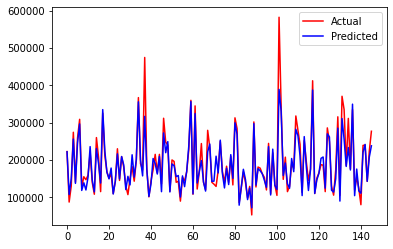

In [37]:
plt.plot(np.exp(y_test),'r',label='Actual')
plt.plot(np.exp(preds),'b',label='Predicted')
plt.legend()

# Testing on the real test data

## 1) Importing the test dataset

In [0]:
df = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/test.csv')

## 2) DataPreprocessing



In [0]:
# Deleting the columns that were deleted in the training set

cols_to_del = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [0]:
for i in cols_to_del:
  df = df.drop(i,axis=1)

In [52]:
# Taking categorical features out for work and transformation

cat_cols = []

for col in df.columns:
  if df[col].dtype == 'O':
    cat_cols.append(col)

cat_cols    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [0]:
# Converting the datatype from `Object` to `Category`

for col in cat_cols:
  df[col] = df[col].astype('category')

In [0]:
# Converting the values of categorical data to int

for col in cat_cols:
  df[col] = df[col].cat.codes.values

## 3) Splitting the data into 35 Important features.

In [0]:
X_test = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea','LotShape',
       'LotConfig','Neighborhood', 'Condition1', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
       'BsmtUnfSF', 'TotalBsmtSF','HeatingQC','1stFlrSF', '2ndFlrSF','GrLivArea',
       'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageFinish', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF','MoSold', 'YrSold']].values

## 4) Result Prediction

In [0]:
y_preds = xg_reg.predict(X_test)

## 5) Conversion into real values

In [0]:
y_preds = np.exp(y_preds)

In [58]:
y_preds

array([124693.375, 160328.58 , 186883.52 , ..., 167554.06 , 114860.766,
       224410.84 ], dtype=float32)

## 6) Conversion of results into DataFrame

In [59]:
pd.options.display.float_format = '{:.2f}'.format
submission = pd.DataFrame({'id':df['Id'],'SalePrice':y_preds.flatten().astype('double')})
submission

,id,SalePrice
0,1461,124693.38
1,1462,160328.58
2,1463,186883.52
3,1464,190382.00
4,1465,188477.02
...,...,...
1454,2915,74425.23
1455,2916,83874.60
1456,2917,167554.06
1457,2918,114860.77


## 7) Saving of results into a csv file

In [0]:
submission.to_csv('kaggle_xgboost.csv',index=False)